In [1]:
cd ../

/home/users/dmoreno2016


In [2]:
import os
import seaborn as sns

import tensorflow as tf
tf.get_logger().setLevel('INFO')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from codes_implemented.utils import open_subsets, distribution_values, create_df_dataset

%load_ext autoreload
%autoreload 2

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

2023-09-18 15:41:08.617933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
### ------------------------------------------------------------------------ ###

# Dataset ALCOCK
path_subset_train_alcock = f'data/records/alcock/fold_0/alcock_500/train'
path_subset_val_alcock = f'data/records/alcock/fold_0/alcock_500/val'
path_subset_test_alcock = f'data/records/alcock/fold_0/alcock_500/test'

train_alcock, val_alcock, test_alcock = open_subsets(path_subset_train_alcock, 
                                                  path_subset_val_alcock, 
                                                  path_subset_test_alcock)


# Dataset ATLAS
path_subset_train_atlas = f'data/records/atlas/fold_0/atlas_500/train'
path_subset_val_atlas = f'data/records/atlas/fold_0/atlas_500/val'
path_subset_test_atlas = f'data/records/atlas/fold_0/atlas_500/test'

train_atlas, val_atlas, test_atlas = open_subsets(path_subset_train_atlas, 
                                                  path_subset_val_atlas, 
                                                  path_subset_test_atlas)

# Dataset OGLE
path_subset_train_ogle = f'data/records/ogle/fold_0/ogle_500/train'
path_subset_val_ogle = f'data/records/ogle/fold_0/ogle_500/val'
path_subset_test_ogle = f'data/records/ogle/fold_0/ogle_500/test'


train_ogle, val_ogle, test_ogle = open_subsets(path_subset_train_ogle, 
                                               path_subset_val_ogle, 
                                               path_subset_test_ogle)

### ------------------------------------------------------------------------ ###

# Dataset ALCOCK-ATLAS
path_subset_train = f'data/records/alcock_atlas_linear/fold_0/alcock_atlas_linear_500/train'
path_subset_val = f'data/records/alcock_atlas_linear/fold_0/alcock_atlas_linear_500/val'
path_subset_test = f'data/records/alcock_atlas_linear/fold_0/alcock_atlas_linear_500/test'

train_alcock_atlas_linear, val_alcock_atlas_linear, test_alcock_atlas_linear = open_subsets(path_subset_train, 
                                                                        path_subset_val, 
                                                                        path_subset_test)

# Dataset ALCOCK-OGLE
path_subset_train = f'data/records/alcock_ogle_linear/fold_0/alcock_ogle_linear_500/train'
path_subset_val = f'data/records/alcock_ogle_linear/fold_0/alcock_ogle_linear_500/val'
path_subset_test = f'data/records/alcock_ogle_linear/fold_0/alcock_ogle_linear_500/test'


train_alcock_ogle_linear, val_alcock_ogle_linear, test_alcock_ogle_linear = open_subsets(path_subset_train, 
                                                                    path_subset_val, 
                                                                    path_subset_test)

### ------------------------------------------------------------------------ ###

# Dataset KEPLER
path_subset_train = f'data/records/kepler/fold_0/kepler/train'
path_subset_val = f'data/records/kepler/fold_0/kepler/val'
path_subset_test = f'data/records/kepler/fold_0/kepler/test'

train_kepler, val_kepler, test_kepler = open_subsets(path_subset_train, 
                                                     path_subset_val, 
                                                     path_subset_test)

# Dataset KEPLER-ALCOCK
path_subset_train = f'data/records/kepler_alcock_linear/fold_0/kepler_alcock_linear/train'
path_subset_val = f'data/records/kepler_alcock_linear/fold_0/kepler_alcock_linear/val'
path_subset_test = f'data/records/kepler_alcock_linear/fold_0/kepler_alcock_linear/test'


train_kepler_alcock_linear, val_kepler_alcock_linear, test_kepler_alcock_linear = open_subsets(path_subset_train, 
                                                                          path_subset_val, 
                                                                          path_subset_test)

# Dataset KEPLER-ATLAS
path_subset_train = f'data/records/kepler_atlas_linear/fold_0/kepler_atlas_linear/train'
path_subset_val = f'data/records/kepler_atlas_linear/fold_0/kepler_atlas_linear/val'
path_subset_test = f'data/records/kepler_atlas_linear/fold_0/kepler_atlas_linear/test'


train_kepler_atlas_linear, val_kepler_atlas_linear, test_kepler_atlas_linear = open_subsets(path_subset_train, 
                                                                       path_subset_val, 
                                                                       path_subset_test)

# Dataset KEPLER-OGLE
path_subset_train = f'data/records/kepler_ogle_linear/fold_0/kepler_ogle_linear/train'
path_subset_val = f'data/records/kepler_ogle_linear/fold_0/kepler_ogle_linear/val'
path_subset_test = f'data/records/kepler_ogle_linear/fold_0/kepler_ogle_linear/test'


train_kepler_ogle_linear, val_kepler_ogle_linear, test_kepler_ogle_linear = open_subsets(path_subset_train, 
                                                                    path_subset_val, 
                                                                    path_subset_test)


Number of records within a class: RRc
 - opening: data/records/alcock/fold_0/alcock_500/train/RRc/chunk_0.record


2023-09-18 15:42:12.900419: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-09-18 15:42:12.900462: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: e1b09424bcd3
2023-09-18 15:42:12.900471: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: e1b09424bcd3
2023-09-18 15:42:12.900598: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-09-18 15:42:12.900634: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2023-09-18 15:42:12.901005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions 

Number of records within a class: RRab
 - opening: data/records/alcock/fold_0/alcock_500/train/RRab/chunk_0.record
Number of records within a class: Cep_1
 - opening: data/records/alcock/fold_0/alcock_500/train/Cep_1/chunk_0.record
Number of records within a class: Cep_0
 - opening: data/records/alcock/fold_0/alcock_500/train/Cep_0/chunk_0.record
Number of records within a class: LPV
 - opening: data/records/alcock/fold_0/alcock_500/train/LPV/chunk_0.record
Number of records within a class: EC
 - opening: data/records/alcock/fold_0/alcock_500/train/EC/chunk_0.record
Number of records within a class: RRc
 - opening: data/records/alcock/fold_0/alcock_500/val/RRc/chunk_0.record
Number of records within a class: RRab
 - opening: data/records/alcock/fold_0/alcock_500/val/RRab/chunk_0.record
Number of records within a class: Cep_1
 - opening: data/records/alcock/fold_0/alcock_500/val/Cep_1/chunk_0.record
Number of records within a class: Cep_0
 - opening: data/records/alcock/fold_0/alcock_50

In [4]:
### ------------------------------------------------------------------------ ###
# ALCOCK
print('Training distribution')
train_mag_lcs_alcock, train_cadence_alcock = distribution_values(train_alcock)
print('Validation distribution')
val_mag_lcs_alcock, val_cadence_alcock = distribution_values(val_alcock)
print('Test distribution')
test_mag_lcs_alcock, test_cadence_alcock = distribution_values(test_alcock)

# ATLAS
print('Training distribution')
train_mag_lcs_atlas, train_cadence_atlas = distribution_values(train_atlas)
print('Validation distribution')
val_mag_lcs_atlas, val_cadence_atlas = distribution_values(val_atlas)
print('Test distribution')
test_mag_lcs_atlas, test_cadence_atlas = distribution_values(test_atlas)

# OGLE
print('Training distribution')
train_mag_lcs_ogle, train_cadence_ogle = distribution_values(train_ogle)
print('Validation distribution')
val_mag_lcs_ogle, val_cadence_ogle = distribution_values(val_ogle)
print('Test distribution')
test_mag_lcs_ogle, test_cadence_ogle = distribution_values(test_ogle)

### ------------------------------------------------------------------------ ###

# ALCOCK-ATLAS
print('Training distribution')
train_mag_lcs_alcock_atlas, train_cadence_alcock_atlas = distribution_values(train_alcock_atlas_linear)
print('Validation distribution')
val_mag_lcs_alcock_atlas, val_cadence_alcock_atlas = distribution_values(val_alcock_atlas_linear)
print('Test distribution')
test_mag_lcs_alcock_atlas, test_cadence_alcock_atlas = distribution_values(test_alcock_atlas_linear)

# ALCOCK-OGLE
print('Training distribution')
train_mag_lcs_alcock_ogle, train_cadence_alcock_ogle = distribution_values(train_alcock_ogle_linear)
print('Validation distribution')
val_mag_lcs_alcock_ogle, val_cadence_alcock_ogle = distribution_values(val_alcock_ogle_linear)
print('Test distribution')
test_mag_lcs_alcock_ogle, test_cadence_alcock_ogle = distribution_values(test_alcock_ogle_linear)

### ------------------------------------------------------------------------ ###

# KEPLER
print('Training distribution')
train_mag_lcs_kepler, train_cadence_kepler = distribution_values(train_kepler)
print('Validation distribution')
val_mag_lcs_kepler, val_cadence_kepler = distribution_values(val_kepler)
print('Test distribution')
test_mag_lcs_kepler, test_cadence_kepler = distribution_values(test_kepler)

# KEPLER-ALCOCK
print('Training distribution')
train_mag_lcs_kepler_alcock, train_cadence_kepler_alcock = distribution_values(train_kepler_alcock_linear)
print('Validation distribution')
val_mag_lcs_kepler_alcock, val_cadence_kepler_alcock = distribution_values(val_kepler_alcock_linear)
print('Test distribution')
test_mag_lcs_kepler_alcock, test_cadence_kepler_alcock = distribution_values(test_kepler_alcock_linear)

# KEPLER-ATLAS
print('Training distribution')
train_mag_lcs_kepler_atlas, train_cadence_kepler_atlas = distribution_values(train_kepler_atlas_linear)
print('Validation distribution')
val_mag_lcs_kepler_atlas, val_cadence_kepler_atlas = distribution_values(val_kepler_atlas_linear)
print('Test distribution')
test_mag_lcs_kepler_atlas, test_cadence_kepler_atlas = distribution_values(test_kepler_atlas_linear)

# KEPLER-OGLE
print('Training distribution')
train_mag_lcs_kepler_ogle, train_cadence_kepler_ogle = distribution_values(train_kepler_ogle_linear)
print('Validation distribution')
val_mag_lcs_kepler_ogle, val_cadence_kepler_ogle = distribution_values(val_kepler_ogle_linear)
print('Test distribution')
test_mag_lcs_kepler_ogle, test_cadence_kepler_ogle = distribution_values(test_kepler_ogle_linear)

### ------------------------------------------------------------------------ ###

Training distribution


/home/users/dmoreno2016/codes_implemented/utils.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.concatenate(np.array(mag_lcs)), np.concatenate(np.array(mjd_lcs_diff))


Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution
Training distribution
Validation distribution
Test distribution


In [5]:
alcock_cadence_subsets = [train_cadence_alcock, val_cadence_alcock, test_cadence_alcock]
atlas_cadence_subsets = [train_cadence_atlas, val_cadence_atlas, test_cadence_atlas]
ogle_cadence_subsets = [train_cadence_ogle, val_cadence_ogle, test_cadence_ogle]

alcock_atlas_cadence_subsets = [train_cadence_alcock_atlas, val_cadence_alcock_atlas, test_cadence_alcock_atlas]
alcock_ogle_cadence_subsets = [train_cadence_alcock_ogle, val_cadence_alcock_ogle, test_cadence_alcock_ogle]

kepler_cadence_subsets = [train_cadence_kepler, val_cadence_kepler, test_cadence_kepler]
kepler_alcock_cadence_subsets = [train_cadence_kepler_alcock, val_cadence_kepler_alcock, test_cadence_kepler_alcock]
kepler_atlas_cadence_subsets = [train_cadence_kepler_atlas, val_cadence_kepler_atlas, test_cadence_kepler_atlas]
kepler_ogle_cadence_subsets = [train_cadence_kepler_ogle, val_cadence_kepler_ogle, test_cadence_kepler_ogle]

In [6]:
alcock_cadence_dataset = create_df_dataset(alcock_cadence_subsets, name_col='cadence')
atlas_cadence_dataset = create_df_dataset(atlas_cadence_subsets, name_col='cadence')
ogle_cadence_dataset = create_df_dataset(ogle_cadence_subsets, name_col='cadence')

alcock_atlas_cadence_dataset = create_df_dataset(alcock_atlas_cadence_subsets, name_col='cadence')
alcock_ogle_cadence_dataset = create_df_dataset(alcock_ogle_cadence_subsets, name_col='cadence')

kepler_cadence_dataset = create_df_dataset(kepler_cadence_subsets, name_col='cadence')
kepler_alcock_cadence_dataset = create_df_dataset(kepler_alcock_cadence_subsets, name_col='cadence')
kepler_atlas_cadence_dataset = create_df_dataset(kepler_atlas_cadence_subsets, name_col='cadence')
kepler_ogle_cadence_dataset = create_df_dataset(kepler_ogle_cadence_subsets, name_col='cadence')

In [7]:
X_alcock = alcock_cadence_dataset['cadence'].values
X_atlas = atlas_cadence_dataset['cadence'].values
X_ogle = ogle_cadence_dataset['cadence'].values

print(X_alcock.shape)
print(X_atlas.shape)
print(X_ogle.shape)

print('*'*30)

X_alcock_atlas = alcock_atlas_cadence_dataset['cadence'].values
X_alcock_ogle = alcock_ogle_cadence_dataset['cadence'].values

print(X_alcock_atlas.shape)
print(X_alcock_ogle.shape)

print('*'*30)

X_kepler = kepler_cadence_dataset['cadence'].values
X_kepler_alcock = kepler_alcock_cadence_dataset['cadence'].values
X_kepler_atlas = kepler_atlas_cadence_dataset['cadence'].values
X_kepler_ogle = kepler_ogle_cadence_dataset['cadence'].values

print(X_kepler.shape)
print(X_kepler_alcock.shape)
print(X_kepler_atlas.shape)
print(X_kepler_ogle.shape)

(2506759,)
(375084,)
(4698161,)
******************************
(1706648,)
(1978780,)
******************************
(118653545,)
(697876,)
(610688,)
(768325,)


In [8]:
print('**************** ALCOCK dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_alcock)))
print('Media: {:.3f}'.format(np.mean(X_alcock)))
print('Std: {:.3f}'.format(np.std(X_alcock)))
print('Min: {:.3f}'.format(np.min(X_alcock)))
print('Max: {:.3f}'.format(np.max(X_alcock)))

print('**************** ATLAS dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_atlas)))
print('Media: {:.3f}'.format(np.mean(X_atlas)))
print('Std: {:.3f}'.format(np.std(X_atlas)))
print('Min: {:.3f}'.format(np.min(X_atlas)))
print('Max: {:.3f}'.format(np.max(X_atlas)))

print('**************** OGLE dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_ogle)))
print('Media: {:.3f}'.format(np.mean(X_ogle)))
print('Std: {:.3f}'.format(np.std(X_ogle)))
print('Min: {:.3f}'.format(np.min(X_ogle)))
print('Max: {:.3f}'.format(np.max(X_ogle)))

print('**************** ALCOCK_ATLAS dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_alcock_atlas)))
print('Media: {:.3f}'.format(np.mean(X_alcock_atlas)))
print('Std: {:.3f}'.format(np.std(X_alcock_atlas)))

print('**************** ALCOCK_OGLE dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_alcock_ogle)))
print('Media: {:.3f}'.format(np.mean(X_alcock_ogle)))
print('Std: {:.3f}'.format(np.std(X_alcock_ogle)))

print('**************** KEPLER dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_kepler)))
print('Media: {:.3f}'.format(np.mean(X_kepler)))
print('Std: {:.3f}'.format(np.std(X_kepler)))

print('**************** KEPLER_ALCOCK dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_kepler_alcock)))
print('Media: {:.3f}'.format(np.mean(X_kepler_alcock)))
print('Std: {:.3f}'.format(np.std(X_kepler_alcock)))

print('**************** KEPLER_ATLAS dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_kepler_atlas)))
print('Media: {:.3f}'.format(np.mean(X_kepler_atlas)))
print('Std: {:.3f}'.format(np.std(X_kepler_atlas)))

print('**************** KEPLER_OGLE dataset ****************')
print('Mediana: {:.3f}'.format(np.median(X_kepler_ogle)))
print('Media: {:.3f}'.format(np.mean(X_kepler_ogle)))
print('Std: {:.3f}'.format(np.std(X_kepler_ogle)))

**************** ALCOCK dataset ****************
Mediana: 1.930
Media: 3.827
Std: 10.607
Min: 0.000
Max: 1533.992
**************** ATLAS dataset ****************
Mediana: 0.016
Media: 4.864
Std: 19.766
Min: 0.000
Max: 621.230
**************** OGLE dataset ****************
Mediana: 1.094
Media: 3.492
Std: 14.510
Min: 0.001
Max: 2156.921
**************** ALCOCK_ATLAS dataset ****************
Mediana: 0.113
Media: 4.740
Std: 18.889
**************** ALCOCK_OGLE dataset ****************
Mediana: 1.535
Media: 3.776
Std: 13.283
**************** KEPLER dataset ****************
Mediana: 0.020
Media: 0.024
Std: 0.510
**************** KEPLER_ALCOCK dataset ****************
Mediana: 2.066
Media: 4.097
Std: 9.947
**************** KEPLER_ATLAS dataset ****************
Mediana: 0.113
Media: 4.589
Std: 18.382
**************** KEPLER_OGLE dataset ****************
Mediana: 1.531
Media: 3.689
Std: 12.724


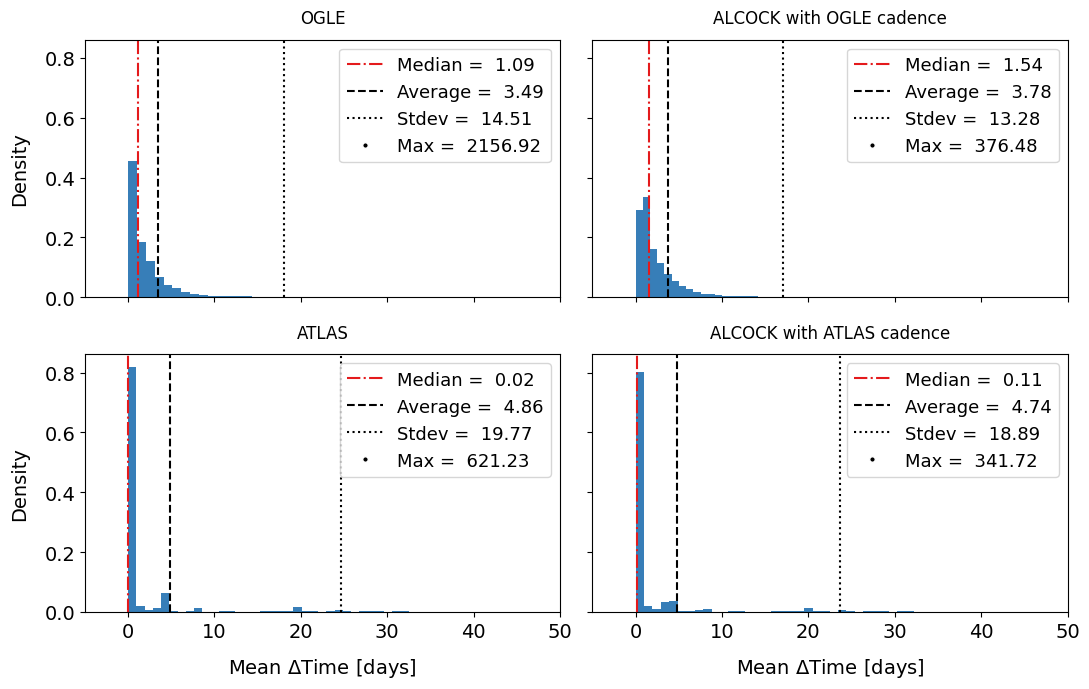

In [9]:
import matplotlib.lines as mlines

fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharey=True, sharex=True)
#fig.suptitle('Cadence distribution', x=0.52, size=17)

aux_bins = np.array([[200, 200],
                     [200, 200]])
bins = np.array([[1900, 450],
                 [250, 150]])
bins += aux_bins
name_datasets = [['OGLE', 'ATLAS'],
                 ['ALCOCK with OGLE cadence', 'ALCOCK with ATLAS cadence']]
datasets = [[ogle_cadence_dataset, atlas_cadence_dataset],
            [alcock_ogle_cadence_dataset, alcock_atlas_cadence_dataset]]

inf_xlim = -5
sup_xlim = 50

for col, col_datasets in enumerate(zip(bins, name_datasets, datasets)):
    for row, row_dataset in enumerate(zip(col_datasets[0], col_datasets[1], col_datasets[2])):
        # ALCOCK
        axes[row][col].hist(row_dataset[2]['cadence'], density=True, bins=row_dataset[0], color='#377eb8')
        axes[row][col].set_title(row_dataset[1], fontsize=12, pad=12)

        avg = np.average(row_dataset[2]['cadence'])
        median = np.median(row_dataset[2]['cadence'])
        std = np.std(row_dataset[2]['cadence'])
        max_value = np.max(row_dataset[2]['cadence'])
        min_value = np.min(row_dataset[2]['cadence'])
        
        axes[row][col].axvline(median, linestyle='dashdot', color='#e41a1c', label=f'Median = {median: .2f}')
        axes[row][col].axvline(avg, linestyle='--', color='k', label=f'Average = {avg: .2f}')
        axes[row][col].axvline(avg - std, linestyle=':', color='k', label=f'Stdev = {std: .2f}')
        axes[row][col].axvline(avg + std, linestyle=':', color='k')

        handles, labels = axes[row][col].get_legend_handles_labels()
        point_max = mlines.Line2D([0], [0], marker='o', color='w', label=f'Max = {max_value: .2f}',
                                  markerfacecolor='black', markersize=4, ls = '')
        handles.extend([point_max])
        axes[row][col].legend(handles=handles, fontsize=13)
        
        if col == 0:
            axes[row][col].set_ylabel('Density', fontsize=14, labelpad=11) # Y label

        if row == len(datasets[0])-1:
            axes[row][col].set_xlabel(r'Mean $\Delta$Time [days]', fontsize=14, labelpad=11) # X label 
        
        axes[row][col].tick_params(axis='both', labelsize=14)

        axes[row][col].set_xlim([inf_xlim, sup_xlim])
    
plt.tight_layout()
#plt.savefig('./Analysis_data/Cadence_distribution_PAPER_data.png', bbox_inches='tight')
plt.show()

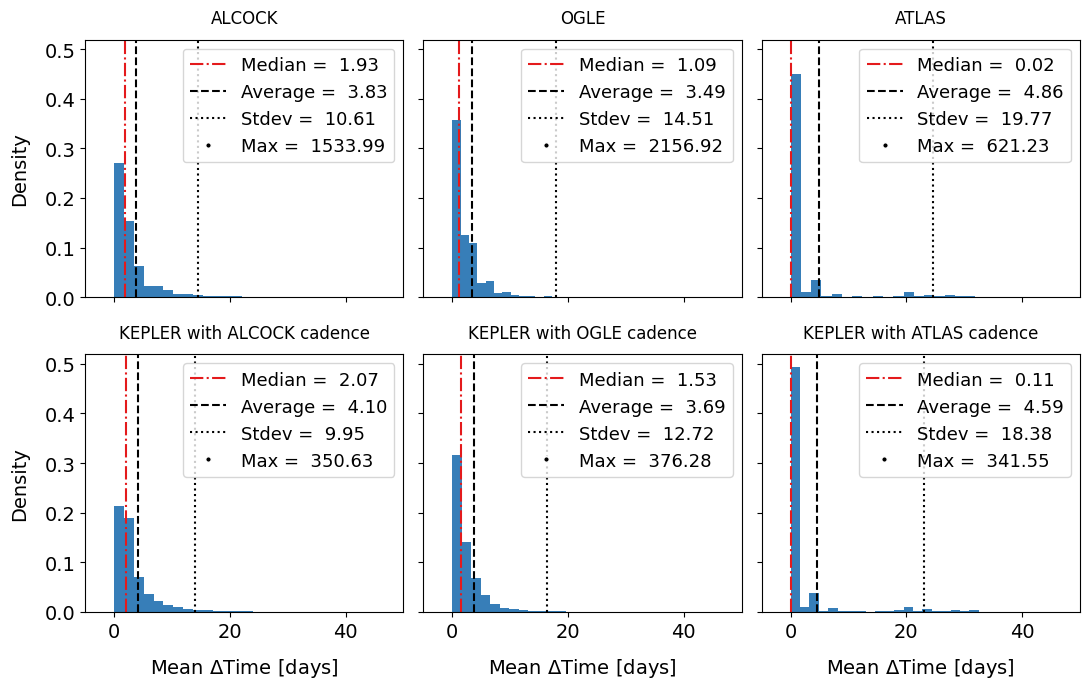

In [10]:
import matplotlib.lines as mlines

fig, axes = plt.subplots(2, 3, figsize=(11, 7), sharey=True, sharex=True)
#fig.suptitle('Cadence distribution', x=0.52, size=17)

aux_bins = np.array([[200, 180],
                     [200, 200],
                     [200, 200]])
bins = np.array([[700, 25],
                 [1300, 30],
                 [150, 10]])
bins += aux_bins
name_datasets = [['ALCOCK', 'KEPLER with ALCOCK cadence'],
                 ['OGLE', 'KEPLER with OGLE cadence'],
                 ['ATLAS', 'KEPLER with ATLAS cadence']]
datasets = [[alcock_cadence_dataset, kepler_alcock_cadence_dataset],
            [ogle_cadence_dataset, kepler_ogle_cadence_dataset],
            [atlas_cadence_dataset, kepler_atlas_cadence_dataset]]

inf_xlim = -5
sup_xlim = 50

for col, col_datasets in enumerate(zip(bins, name_datasets, datasets)):
    for row, row_dataset in enumerate(zip(col_datasets[0], col_datasets[1], col_datasets[2])):
        # ALCOCK
        axes[row][col].hist(row_dataset[2]['cadence'], density=True, bins=row_dataset[0], color='#377eb8')
        axes[row][col].set_title(row_dataset[1], fontsize=12, pad=12)

        avg = np.average(row_dataset[2]['cadence'])
        median = np.median(row_dataset[2]['cadence'])
        std = np.std(row_dataset[2]['cadence'])
        max_value = np.max(row_dataset[2]['cadence'])
        min_value = np.min(row_dataset[2]['cadence'])
        
        axes[row][col].axvline(median, linestyle='dashdot', color='#e41a1c', label=f'Median = {median: .2f}')
        axes[row][col].axvline(avg, linestyle='--', color='k', label=f'Average = {avg: .2f}')
        axes[row][col].axvline(avg - std, linestyle=':', color='k', label=f'Stdev = {std: .2f}')
        axes[row][col].axvline(avg + std, linestyle=':', color='k')

        handles, labels = axes[row][col].get_legend_handles_labels()
        point_max = mlines.Line2D([0], [0], marker='o', color='w', label=f'Max = {max_value: .2f}',
                                  markerfacecolor='black', markersize=4, ls = '')
        handles.extend([point_max])
        axes[row][col].legend(handles=handles, fontsize=13)
        
        if col == 0:
            axes[row][col].set_ylabel('Density', fontsize=14, labelpad=11) # Y label

        if row == len(datasets[0])-1:
            axes[row][col].set_xlabel(r'Mean $\Delta$Time [days]', fontsize=14, labelpad=11) # X label 
        
        axes[row][col].tick_params(axis='both', labelsize=14)

        axes[row][col].set_xlim([inf_xlim, sup_xlim])
    
plt.tight_layout()
#plt.savefig('./Analysis_data/Cadence_distribution_PAPER_data.png', bbox_inches='tight')
plt.show()

In [11]:
alcock_mag_lcs_subsets = [train_mag_lcs_alcock, val_mag_lcs_alcock, test_mag_lcs_alcock]
alcock_atlas_mag_lcs_subsets = [train_mag_lcs_alcock_atlas, val_mag_lcs_alcock_atlas, test_mag_lcs_alcock_atlas]
alcock_ogle_mag_lcs_subsets = [train_mag_lcs_alcock_ogle, val_mag_lcs_alcock_ogle, test_mag_lcs_alcock_ogle]

alcock_mag_lcs_dataset = create_df_dataset(alcock_mag_lcs_subsets, name_col='Magnitude')
alcock_atlas_mag_lcs_dataset = create_df_dataset(alcock_atlas_mag_lcs_subsets, name_col='Magnitude')
alcock_ogle_mag_lcs_dataset = create_df_dataset(alcock_ogle_mag_lcs_subsets, name_col='Magnitude')

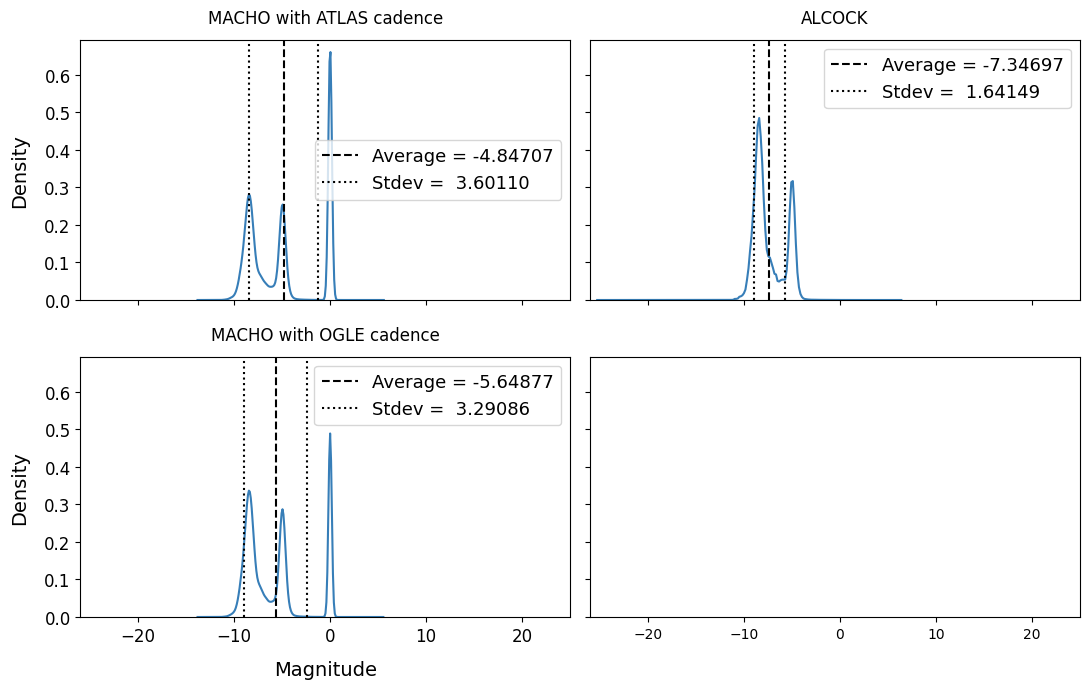

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharey=True, sharex=True)
#fig.suptitle('Flux distribution', x=0.53, size=17)

name_datasets = [['ALCOCK with ATLAS cadence', 'ALCOCK with OGLE cadence'],
                 ['ALCOCK']]
datasets = [[alcock_atlas_mag_lcs_dataset, alcock_ogle_mag_lcs_dataset],
            [alcock_mag_lcs_dataset]]

inf_xlim = -26
sup_xlim = 25
                 
for col, col_datasets in enumerate(zip(name_datasets, datasets)):
    for row, row_dataset in enumerate(zip(col_datasets[0], col_datasets[1])):
        # DATASET
        sns.kdeplot(data=row_dataset[1], x="Magnitude", ax=axes[row][col], color='#377eb8')
        axes[row][col].set(xlabel=None)

        axes[row][col].set_title(row_dataset[0], fontsize=12, pad=12)

        avg = np.average(row_dataset[1]['Magnitude'])
        std = np.std(row_dataset[1]['Magnitude'])
        axes[row][col].axvline(avg, linestyle='--', color='k', label=f'Average = {avg: .5f}')
        axes[row][col].axvline(avg - std, linestyle=':', color='k', label=f'Stdev = {std: .5f}')
        axes[row][col].axvline(avg + std, linestyle=':', color='k')
        axes[row][col].legend(fontsize=13)

        axes[row][col].set_xlim([inf_xlim, sup_xlim])
        axes[row][col].set_xlim([inf_xlim, sup_xlim])
        axes[row][col].set_xlim([inf_xlim, sup_xlim])
        
        axes[row][col].set_ylabel('Density', fontsize=14, labelpad=11) # Y label
        axes[row][col].set_xlabel('Magnitude', fontsize=14, labelpad=11) # X label
        
        axes[row][col].tick_params(axis='both', labelsize=12)

plt.tight_layout()
#plt.savefig('./Analysis_data/Magnitude_distribution_PAPER_data.png', bbox_inches='tight')
plt.show()  

In [12]:
kepler_mag_lcs_subsets = [train_mag_lcs_kepler, val_mag_lcs_kepler, test_mag_lcs_kepler]
kepler_alcock_mag_lcs_subsets = [train_mag_lcs_kepler_alcock, val_mag_lcs_kepler_alcock, test_mag_lcs_kepler_alcock]
kepler_atlas_mag_lcs_subsets = [train_mag_lcs_kepler_atlas, val_mag_lcs_kepler_atlas, test_mag_lcs_kepler_atlas]
kepler_ogle_mag_lcs_subsets = [train_mag_lcs_kepler_ogle, val_mag_lcs_kepler_ogle, test_mag_lcs_kepler_ogle]

kepler_mag_lcs_dataset = create_df_dataset(kepler_mag_lcs_subsets, name_col='Magnitude')
kepler_alcock_mag_lcs_dataset = create_df_dataset(kepler_alcock_mag_lcs_subsets, name_col='Magnitude')
kepler_atlas_mag_lcs_dataset = create_df_dataset(kepler_atlas_mag_lcs_subsets, name_col='Magnitude')
kepler_ogle_mag_lcs_dataset = create_df_dataset(kepler_ogle_mag_lcs_subsets, name_col='Magnitude')

In [15]:
print('KEPLER')
print(np.median(kepler_mag_lcs_dataset['Magnitude']))
print(np.average(kepler_mag_lcs_dataset['Magnitude']))
print(np.std(kepler_mag_lcs_dataset['Magnitude']))
print(np.min(kepler_mag_lcs_dataset['Magnitude']))
print(np.max(kepler_mag_lcs_dataset['Magnitude']))
print('')

print('KEPLER WITH ALCOCK CADENCE')
print(np.median(kepler_alcock_mag_lcs_dataset['Magnitude']))
print(np.average(kepler_alcock_mag_lcs_dataset['Magnitude']))
print(np.std(kepler_alcock_mag_lcs_dataset['Magnitude']))
print(np.min(kepler_alcock_mag_lcs_dataset['Magnitude']))
print(np.max(kepler_alcock_mag_lcs_dataset['Magnitude']))
print('')

print('KEPLER WITH ATLAS CADENCE')
print(np.median(kepler_atlas_mag_lcs_dataset['Magnitude']))
print(np.average(kepler_atlas_mag_lcs_dataset['Magnitude']))
print(np.std(kepler_atlas_mag_lcs_dataset['Magnitude']))
print(np.min(kepler_atlas_mag_lcs_dataset['Magnitude']))
print(np.max(kepler_atlas_mag_lcs_dataset['Magnitude']))
print('')

print('KEPLER WITH OGLE CADENCE')
print(np.median(kepler_ogle_mag_lcs_dataset['Magnitude']))
print(np.average(kepler_ogle_mag_lcs_dataset['Magnitude']))
print(np.std(kepler_ogle_mag_lcs_dataset['Magnitude']))
print(np.min(kepler_ogle_mag_lcs_dataset['Magnitude']))
print(np.max(kepler_ogle_mag_lcs_dataset['Magnitude']))

KEPLER
1.0
0.99313
0.053456675
0.070589
3.258238

KEPLER WITH ALCOCK CADENCE
0.99982995
0.9926946
0.051478624
0.08647729
2.1499841

KEPLER WITH ATLAS CADENCE
0.9998264
0.99281615
0.051709827
0.086613186
2.1218128

KEPLER WITH OGLE CADENCE
0.99986356
0.99280024
0.051163025
0.09187141
2.1079597


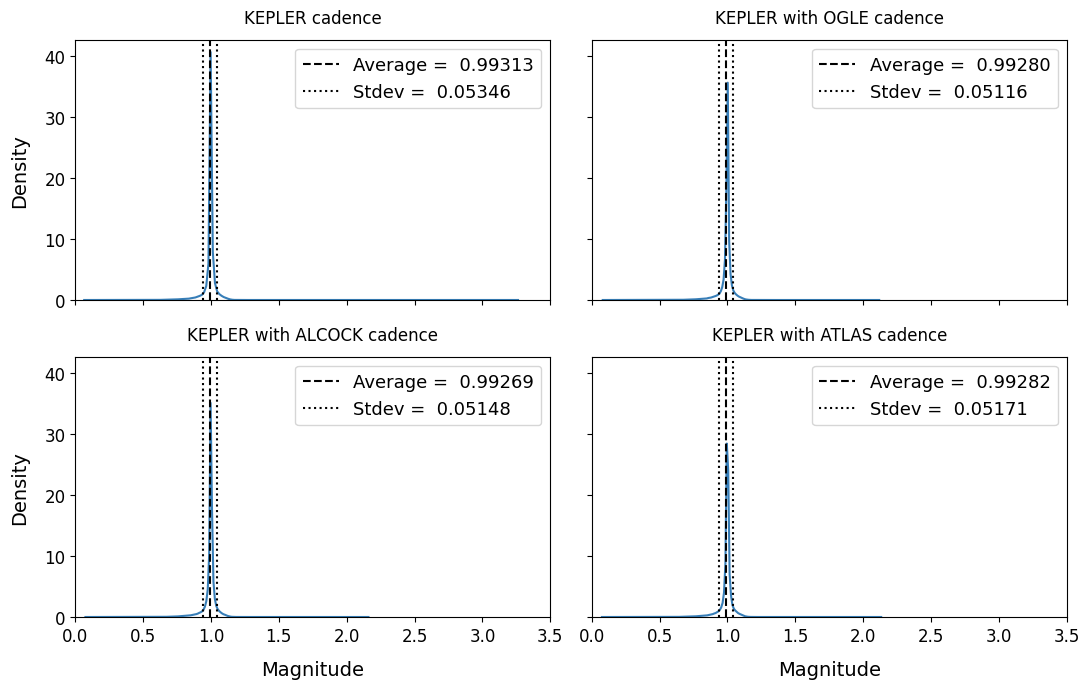

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharey=True, sharex=True)
#fig.suptitle('Flux distribution', x=0.53, size=17)

name_datasets = [['KEPLER cadence', 'KEPLER with ALCOCK cadence'],
                 ['KEPLER with OGLE cadence', 'KEPLER with ATLAS cadence']]
datasets = [[kepler_mag_lcs_dataset, kepler_alcock_mag_lcs_dataset],
            [kepler_ogle_mag_lcs_dataset, kepler_atlas_mag_lcs_dataset]]

inf_xlim = 0
sup_xlim = 3.5
                 
for col, col_datasets in enumerate(zip(name_datasets, datasets)):
    for row, row_dataset in enumerate(zip(col_datasets[0], col_datasets[1])):
        # DATASET
        sns.kdeplot(data=row_dataset[1], x="Magnitude", ax=axes[row][col], color='#377eb8')
        axes[row][col].set(xlabel=None)

        axes[row][col].set_title(row_dataset[0], fontsize=12, pad=12)

        avg = np.average(row_dataset[1]['Magnitude'])
        std = np.std(row_dataset[1]['Magnitude'])
        axes[row][col].axvline(avg, linestyle='--', color='k', label=f'Average = {avg: .5f}')
        axes[row][col].axvline(avg - std, linestyle=':', color='k', label=f'Stdev = {std: .5f}')
        axes[row][col].axvline(avg + std, linestyle=':', color='k')
        axes[row][col].legend(fontsize=13)

        axes[row][col].set_xlim([inf_xlim, sup_xlim])
        axes[row][col].set_xlim([inf_xlim, sup_xlim])
        axes[row][col].set_xlim([inf_xlim, sup_xlim])
        
        axes[row][col].set_ylabel('Density', fontsize=14, labelpad=11) # Y label
        axes[row][col].set_xlabel('Magnitude', fontsize=14, labelpad=11) # X label
        
        axes[row][col].tick_params(axis='both', labelsize=12)

plt.tight_layout()
#plt.savefig('./Analysis_data/Magnitude_distribution_PAPER_data.png', bbox_inches='tight')
plt.show()  